# DSC180A Causal Discovery of Remote Work and Mental Health
group members: Evelyn, Vivan, Jason, Yishan

In [1]:
#! pip install causal-learn
#! pip install --upgrade matplotlib

## Setup

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

from causallearn.search.ConstraintBased.PC import pc
from causallearn.search.ScoreBased.GES import ges
import matplotlib.image as mpimg
import networkx as n
from causallearn.search.ConstraintBased.FCI import fci
from causallearn.utils.GraphUtils import GraphUtils

from causallearn.search.FCMBased.ANM.ANM import ANM
from sklearn.linear_model import LinearRegression

In [12]:
data = pd.read_csv("data.csv")

# Algorithm

## PC algorithm

In [13]:
new_data = data.drop(columns = {'Education_Level', 'Extroverted'}, axis = 1)
new_data

,Family_Members,Company_Support,Work_Location,Social_Isolation_Rating,Sleep,Stress_Level,Exercise_Level,Average_Daily_Work_Hours
0,1,4,1,1.000000,4.000000,1.598186,4.000000,7.578096
1,0,2,1,1.000000,1.169698,3.827589,0.393816,11.063991
2,1,1,1,1.000000,3.477512,1.149310,2.438587,9.803443
3,3,1,1,1.000000,3.614454,1.007035,2.324262,8.425012
4,0,3,3,3.293175,3.241105,3.565357,2.866853,12.750483
...,...,...,...,...,...,...,...,...
4995,1,4,2,2.356483,2.559473,4.113974,2.145069,12.592046
4996,0,5,1,1.000000,4.000000,1.393576,4.000000,10.009057
4997,0,1,2,1.384344,1.494679,4.494597,0.729818,11.113678
4998,3,3,1,1.000000,4.000000,1.670860,3.289979,10.049100


### PC（0.05 fisher-z）

  0%|          | 0/8 [00:00<?, ?it/s]

Green: undirected; Blue: directed; Red: bi-directed



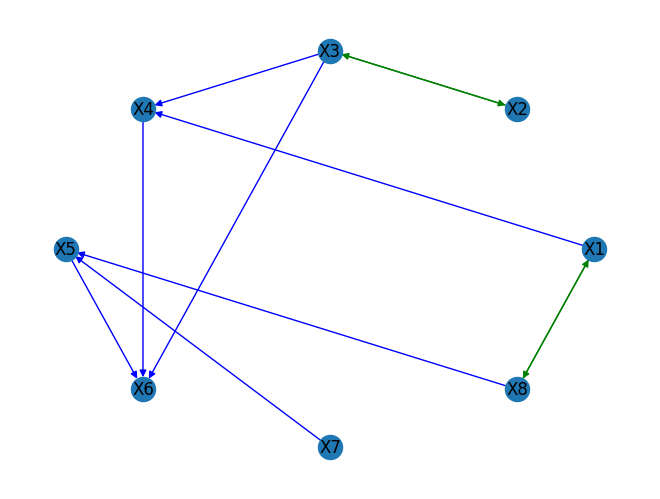

In [14]:
alpha = 0.05 
indep_test = "fisherz"
stable = True  # Whether to use a stable version of the algorithm
uc_rule = 0  # Unshielded collider discovery rule (0, 1, or 2; try default 0 first)
uc_priority = False  # Unshielded collider priority; default False
mvpc = False  # Missing values in PC algorithm, default False
correction_name = None  # Name of correction for independence tests; default None
background_knowledge = None  # Optional prior knowledge to guide the algorithm
verbose = False  # Whether to print additional info during execution
show_progress = True  # Show progress in long runs

cg = pc(new_data.values, alpha, indep_test, stable, uc_rule, uc_priority, mvpc, correction_name, background_knowledge, verbose, show_progress)

cg.to_nx_graph()
cg.draw_nx_graph(skel=False)

### PC (0.05 kci)

590minutes

Depth=3, working on node 7: 100%|██████████| 8/8 [05:52<00:00, 44.09s/it]      


Green: undirected; Blue: directed; Red: bi-directed



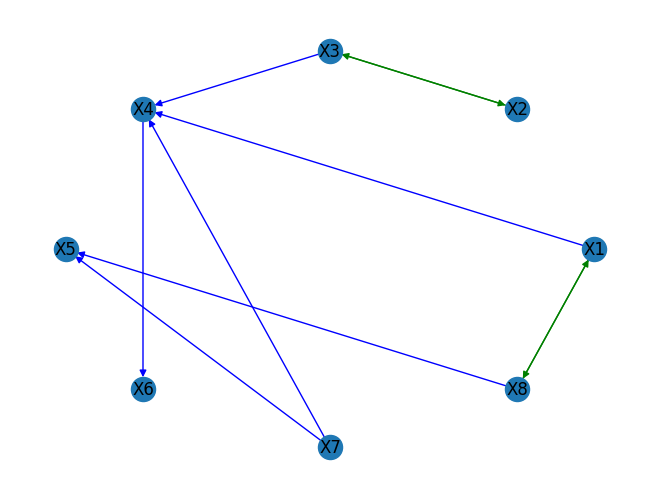

In [ ]:

alpha = 0.05 
indep_test = "kci" 
stable = True  # Whether to use a stable version of the algorithm
uc_rule = 0  # Unshielded collider discovery rule (0, 1, or 2; try default 0 first)
uc_priority = False  # Unshielded collider priority; default False
mvpc = False  # Missing values in PC algorithm, default False
correction_name = None  # Name of correction for independence tests; default None
background_knowledge = None  # Optional prior knowledge to guide the algorithm
verbose = False  # Whether to print additional info during execution
show_progress = True

cg = pc(new_data.values, alpha, indep_test, stable, uc_rule, uc_priority, mvpc, correction_name, background_knowledge, verbose, show_progress)

cg.to_nx_graph()
cg.draw_nx_graph(skel=False)

### PC (0.01 fisherz)

  0%|          | 0/8 [00:00<?, ?it/s]

Green: undirected; Blue: directed; Red: bi-directed



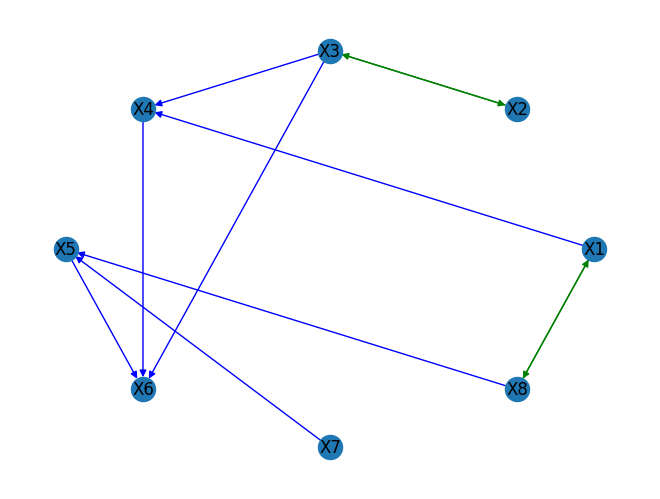

In [15]:
alpha = 0.01 
indep_test = "fisherz" 
stable = True  # Whether to use a stable version of the algorithm
uc_rule = 0  # Unshielded collider discovery rule (0, 1, or 2; try default 0 first)
uc_priority = False  # Unshielded collider priority; default False
mvpc = False  # Missing values in PC algorithm, default False
correction_name = None  # Name of correction for independence tests; default None
background_knowledge = None  # Optional prior knowledge to guide the algorithm
verbose = False  # Whether to print additional info during execution
show_progress = True  # Show progress in long runs

cg = pc(new_data.values, alpha, indep_test, stable, uc_rule, uc_priority, mvpc, correction_name, background_knowledge, verbose, show_progress)

cg.to_nx_graph()
cg.draw_nx_graph(skel=False)

### PC (0.01 kci)

528minutes

Depth=2, working on node 7: 100%|██████████| 8/8 [4:33:18<00:00, 2049.86s/it]  


Green: undirected; Blue: directed; Red: bi-directed



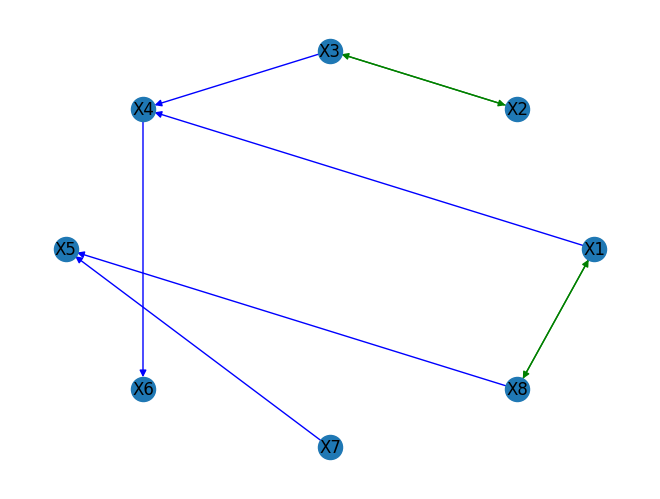

In [ ]:
alpha = 0.01 
indep_test = "kci" 
stable = True  # Whether to use a stable version of the algorithm
uc_rule = 0  # Unshielded collider discovery rule (0, 1, or 2; try default 0 first)
uc_priority = False  # Unshielded collider priority; default False
mvpc = False  # Missing values in PC algorithm, default False
correction_name = None  # Name of correction for independence tests; default None
background_knowledge = None  # Optional prior knowledge to guide the algorithm
verbose = False  # Whether to print additional info during execution
show_progress = True

cg = pc(new_data.values, alpha, indep_test, stable, uc_rule, uc_priority, mvpc, correction_name, background_knowledge, verbose, show_progress)

cg.to_nx_graph()
cg.draw_nx_graph(skel=False)

In [20]:
new_data.columns

Index(['Family_Members', 'Company_Support', 'Work_Location',
       'Social_Isolation_Rating', 'Sleep', 'Stress_Level', 'Exercise_Level',
       'Average_Daily_Work_Hours'],
      dtype='object')

1.'Family_Members'
2.'Company_Support'
3.'Work_Location'
4.'Social_Isolation_Rating'
5.'Sleep'
6.'Stress_Level'
7.'Exercise_Level'
8.'Average_Daily_Work_Hours'

## FCI algorithm

### FCI （0.05 fisher-z）

In [16]:
independence_test_method = "fisherz"  
alpha = 0.05                   
depth = -1                     
max_path_length = -1        

# Run FCI with customized parameters
g, edges = fci(new_data.values, independence_test_method, alpha, depth, max_path_length)

pdy = GraphUtils.to_pydot(g)
pdy.write_png('figure/fci_0.05_fisherz.png')

  0%|          | 0/8 [00:00<?, ?it/s]

X5 --> X6


### FCI (0.05 kci)

In [ ]:
alpha = 0.05 
indep_test = "kci"
depth = -1  # Default depth of search; -1 implies an unlimited depth
max_path_length = -1  # Maximum path length in the algorithm; -1 means no limit
background_knowledge = None 
verbose = False  # Toggle for additional output during the algorithm

# Run the FCI algorithm
g, edges = fci(
    new_data.values,
    indep_test,
    alpha,
    depth,
    max_path_length,
    verbose,
    background_knowledge,
    cache_variables_map=None 
)

# Visualize the resulting graph
pdy = GraphUtils.to_pydot(g)
pdy.write_png('figure/fci_0.05_kci.png') 

### FCI (0.05 fast kci)

In [17]:
from FastKCI import FastKCI_CInd

fast_kci_independence_test = FastKCI_CInd()
g, edges = fci(
    new_data.values,
    indep_test=fast_kci_independence_test.compute_pvalue,  # Pass the method here
    alpha=0.05,
    depth=-1,
    max_path_length=-1,
    verbose=False,
    background_knowledge=None,
    cache_variables_map=None  # If you don't have a cached variable map
)
# Visualize the resulting graph
pdy = GraphUtils.to_pydot(g)
pdy.write_png('figure/fci_0.05_fastkci.png')

  0%|          | 0/8 [00:00<?, ?it/s]

X5 --> X6


### FCI （0.01 fisher-z）

In [18]:
alpha = 0.01  
indep_test = "fisherz" 
depth = -1  # Default depth of search; -1 implies an unlimited depth
max_path_length = -1  # Maximum path length in the algorithm; -1 means no limit
background_knowledge = None 
verbose = False  # Toggle for additional output during the algorithm

# Run the FCI algorithm
g, edges = fci(
    new_data.values,
    indep_test,
    alpha,
    depth,
    max_path_length,
    verbose,
    background_knowledge,
    cache_variables_map=None
)

# Visualize the resulting graph
pdy = GraphUtils.to_pydot(g)
pdy.write_png('figure/fci_0.01_fisherz.png')

  0%|          | 0/8 [00:00<?, ?it/s]

X5 --> X6


### FCI (0.01 kci)

In [ ]:
# Set parameters for the FCI algorithm
alpha = 0.01  
indep_test = "kci"  
depth = -1  # Default depth of search; -1 implies an unlimited depth
max_path_length = -1  # Maximum path length in the algorithm; -1 means no limit
background_knowledge = None 
verbose = False  # Toggle for additional output during the algorithm

# Run the FCI algorithm
g, edges = fci(
    new_data.values,
    indep_test,
    alpha,
    depth,
    max_path_length,
    verbose,
    background_knowledge,
    cache_variables_map=None 
)

# Visualize the resulting graph
pdy = GraphUtils.to_pydot(g)
pdy.write_png('figure/fci_0.01_kci.png')

### FCI (0.01 fast kci)

In [19]:
from FastKCI import FastKCI_CInd

# Initialize FastKCI_CInd object
fast_kci_independence_test = FastKCI_CInd()

# Pass the compute_pvalue method as the independence test method
g, edges = fci(
    new_data.values,
    indep_test=fast_kci_independence_test.compute_pvalue,  # Pass the method here
    alpha=0.01,
    depth=-1,
    max_path_length=-1,
    verbose=False,
    background_knowledge=None,
    cache_variables_map=None  
)

# Visualize the resulting graph
pdy = GraphUtils.to_pydot(g)
pdy.write_png('figure/fci_0.01_fastkci.png')

  0%|          | 0/8 [00:00<?, ?it/s]

X5 --> X6


# GES with BIC score

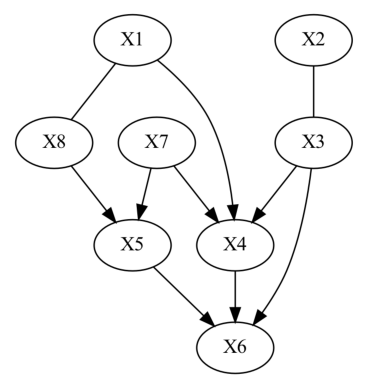

In [8]:
from causallearn.search.ScoreBased.GES import ges
Record = ges(new_data.values, score_func = "local_score_BIC")

# Visualization using pydot

pyd = GraphUtils.to_pydot(Record['G'])
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()


# or save the graph
pyd.write_png('simple_test.png')

## Additive Noise Model

### Family_Members AND Average_Daily_Work_Hours

In [ ]:
anm = ANM()

p_value_forward, p_value_backward = anm.cause_or_effect(new_data['Family_Members'].values.reshape(-1, 1), new_data['Average_Daily_Work_Hours'].values.reshape(-1, 1))
print(p_value_forward, p_value_backward)

3.4544543943137995e-06 0.0


In [ ]:
# Residualize Family_Members
model_family = LinearRegression()
model_family.fit(data[['Education_Level']], data['Family_Members'])
family_residual = data['Family_Members'] - model_family.predict(data[['Education_Level']])

# Residualize Average_Daily_Work_Hours
model_work_hours = LinearRegression()
model_work_hours.fit(data[['Education_Level']], data['Average_Daily_Work_Hours'])
work_hours_residual = data['Average_Daily_Work_Hours'] - model_work_hours.predict(data[['Education_Level']])

# Apply ANM to residuals
p_value_forward, p_value_backward = anm.cause_or_effect(
    family_residual.values.reshape(-1, 1),
    work_hours_residual.values.reshape(-1, 1)
)
print("P-value for Family_Members → Average_Daily_Work_Hours:", p_value_forward)
print("P-value for Average_Daily_Work_Hours → Family_Members:", p_value_backward)


P-value for Family_Members → Average_Daily_Work_Hours: 0.9958043167319165
P-value for Average_Daily_Work_Hours → Family_Members: 0.9950376553986463


### Social_Isolation_Rating AND Exercise_Level

In [ ]:
anm = ANM()

p_value_forward, p_value_backward = anm.cause_or_effect(new_data['Social_Isolation_Rating'].values.reshape(-1, 1), new_data['Exercise_Level'].values.reshape(-1, 1))
print(p_value_forward, p_value_backward)

1.1102230246251565e-16 0.0


In [ ]:
# Residualize Social_Isolation_Rating
model_iso = LinearRegression()
model_iso.fit(data[['Extroverted']], data['Social_Isolation_Rating'])
iso_residual = data['Social_Isolation_Rating'] - model_iso.predict(data[['Extroverted']])

# Residualize Exercise_Level
model_exer = LinearRegression()
model_exer.fit(data[['Extroverted']], data['Exercise_Level'])
exer_residual = data['Exercise_Level'] - model_exer.predict(data[['Extroverted']])

# Apply ANM to residuals
p_value_forward, p_value_backward = anm.cause_or_effect(
    iso_residual.values.reshape(-1, 1),
    exer_residual.values.reshape(-1, 1)
)
print("P-value for Social_Isolation_Rating → Exercise_Level:", p_value_forward)
print("P-value for Exercise_Level → Social_Isolation_Rating:", p_value_backward)

P-value for Social_Isolation_Rating → Exercise_Level: 1.406156628913635e-07
P-value for Exercise_Level → Social_Isolation_Rating: 1.406327855280054e-07


In [ ]:
from itertools import combinations

anm = ANM()

# Define all subsets of predictors
predictors_list = [
    ['Extroverted'],
    ['Work_Location'],
    ['Family_Members'],
    ['Extroverted', 'Work_Location'],
    ['Extroverted', 'Family_Members'],
    ['Work_Location', 'Family_Members'],
    ['Extroverted', 'Work_Location', 'Family_Members']
]

# Test each subset
results = []
for predictors in predictors_list:
    # Residualize Social Isolation Rating
    model_iso = LinearRegression()
    model_iso.fit(data[predictors], data['Social_Isolation_Rating'])
    iso_residual = data['Social_Isolation_Rating'] - model_iso.predict(data[predictors])
    
    # Residualize Exercise Level
    model_exer = LinearRegression()
    model_exer.fit(data[predictors], data['Exercise_Level'])
    exer_residual = data['Exercise_Level'] - model_exer.predict(data[predictors])
    
    # Apply ANM
    p_value_forward, p_value_backward = anm.cause_or_effect(
        iso_residual.values.reshape(-1, 1),
        exer_residual.values.reshape(-1, 1)
    )
    
    # Store results
    results.append({
        'Predictors': predictors,
        'P(Social_Isolation_Rating → Exercise_Level)': p_value_forward,
        'P(Exercise_Level → Social_Isolation_Rating)': p_value_backward
    })

# Display results
for result in results:
    print(f"Predictors: {result['Predictors']}")
    print(f"P-value for Social_Isolation_Rating → Exercise_Level: {result['P(Social_Isolation_Rating → Exercise_Level)']}")
    print(f"P-value for Exercise_Level → Social_Isolation_Rating: {result['P(Exercise_Level → Social_Isolation_Rating)']}")
    print("----")


Predictors: ['Extroverted']
P-value for Social_Isolation_Rating → Exercise_Level: 1.406156628913635e-07
P-value for Exercise_Level → Social_Isolation_Rating: 1.406327855280054e-07
----
Predictors: ['Work_Location']
P-value for Social_Isolation_Rating → Exercise_Level: 0.0
P-value for Exercise_Level → Social_Isolation_Rating: 0.0
----
Predictors: ['Family_Members']
P-value for Social_Isolation_Rating → Exercise_Level: 1.176836406102666e-14
P-value for Exercise_Level → Social_Isolation_Rating: 0.0
----
Predictors: ['Extroverted', 'Work_Location']
P-value for Social_Isolation_Rating → Exercise_Level: 0.0004638236903723447
P-value for Exercise_Level → Social_Isolation_Rating: 0.0004635787886072551
----
Predictors: ['Extroverted', 'Family_Members']
P-value for Social_Isolation_Rating → Exercise_Level: 2.934466582482642e-05
P-value for Exercise_Level → Social_Isolation_Rating: 2.9339993239507756e-05
----
Predictors: ['Work_Location', 'Family_Members']
P-value for Social_Isolation_Rating → Ex